In [1]:
!pip install matplotlib numpy opencv-python



In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread('./Images/rgb.png') 
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  


[ WARN:0@0.248] global loadsave.cpp:241 findDecoder imread_('./Images/rgb.png'): can't open/read file: check file path/integrity


error: OpenCV(4.10.0) /Users/xperience/GHA-Actions-OpenCV/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [744]:
Red_channel=img_rgb[:, :, 0]
Green_channel=img_rgb[:, :, 1]
Blue_channel =img_rgb[:, :, 2]  


(-0.5, 599.5, 399.5, -0.5)

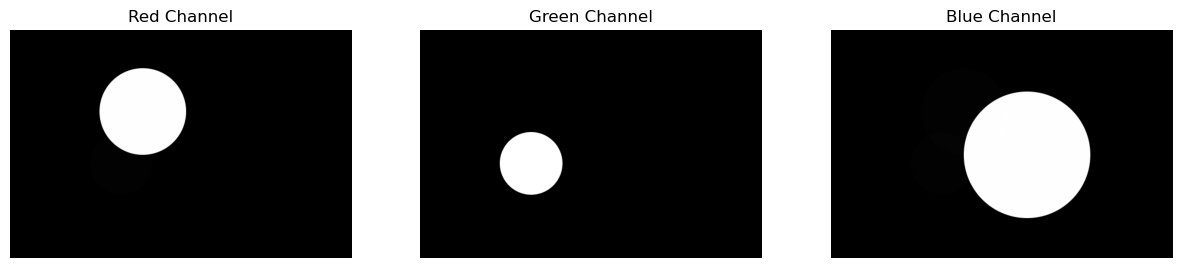

In [745]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(Red_channel, cmap='gray')
plt.title('Red Channel')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(Green_channel, cmap='gray')
plt.title('Green Channel')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(Blue_channel, cmap='gray')
plt.title('Blue Channel')
plt.axis('off')

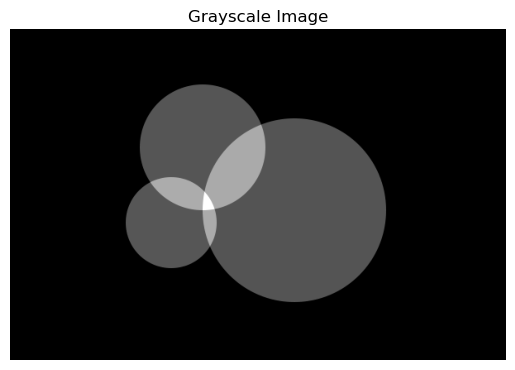

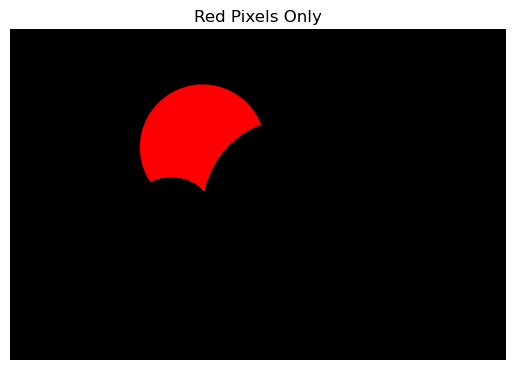

In [779]:
grayscale = (Red_channel.astype(np.uint16) + Green_channel.astype(np.uint16) + Blue_channel.astype(np.uint16)) // 3 #Used uint to prevent the overflow while adding 
#the pixels of R , G , B channel
grayscale = grayscale.astype(np.uint8)  # Converted back to uint8 for display

plt.imshow(grayscale, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()



lower_red = np.array([100, 0, 0])
upper_red = np.array([255, 100, 100])
mask_red = cv2.inRange(img_rgb, lower_red, upper_red)
red_only = cv2.bitwise_and(img_rgb, img_rgb, mask=mask_red)

plt.imshow(red_only)
plt.title('Red Pixels Only')
plt.axis('off')
plt.show()


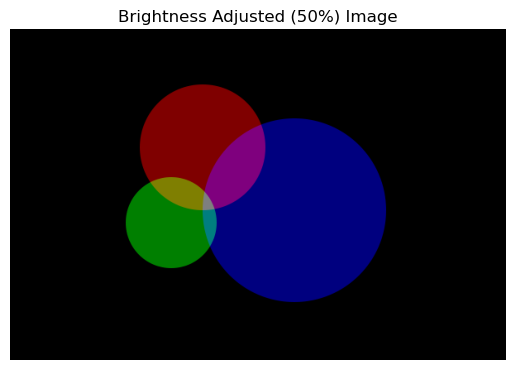

In [777]:
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
img_hsv[:, :, 2] = np.clip(img_hsv[:, :, 2] // 2, 0, 255)  
img_bright_adjusted = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)

plt.imshow(img_bright_adjusted)
plt.title('Brightness Adjusted (50%) Image')
plt.axis('off')
plt.show()

In [903]:

image = cv2.imread('./images/apple.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


lower_rgb = np.array([0, 85, 0])
upper_rgb = np.array([200, 255, 100])

mask_rgb = cv2.inRange(image_rgb, lower_rgb, upper_rgb)
masked_rgb = cv2.bitwise_and(image_rgb, image_rgb, mask=mask_rgb)


image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

lower_hsv = np.array([35, 20, 20])
upper_hsv = np.array([45, 255, 255])

mask_hsv = cv2.inRange(image_hsv, lower_hsv, upper_hsv)
masked_hsv = cv2.bitwise_and(image_rgb, image_rgb, mask=mask_hsv)


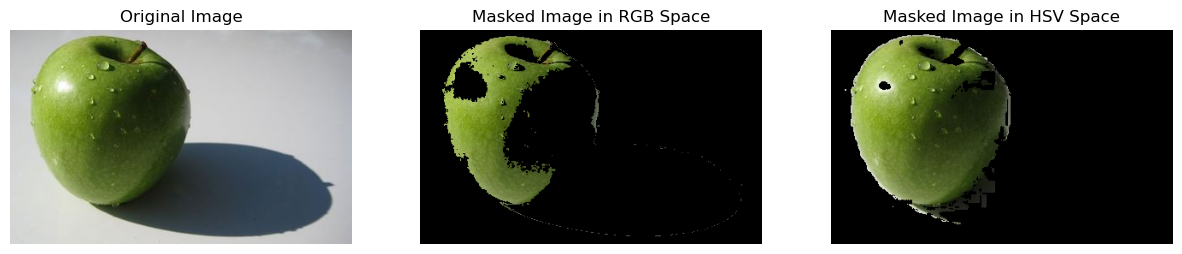

In [905]:

plt.figure(figsize=(15, 5))


plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')


plt.subplot(1, 3, 2)
plt.imshow(masked_rgb)
plt.title('Masked Image in RGB Space')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(masked_hsv)
plt.title('Masked Image in HSV Space')
plt.axis('off')

plt.show()


In [857]:
image_bags = cv2.imread('./images/bags.png')
image_bags_rgb = cv2.cvtColor(image_bags, cv2.COLOR_BGR2RGB)


lower_rgb = np.array([150, 30, 0])
upper_rgb = np.array([255, 110, 90])

mask_rgb = cv2.inRange(image_bags_rgb, lower_rgb, upper_rgb)
masked_rgb = cv2.bitwise_and(image_bags_rgb, image_bags_rgb, mask=mask_rgb)


In [759]:
image_bags_hsv = cv2.cvtColor(image_bags_rgb, cv2.COLOR_RGB2HSV)


lower_hsv = np.array([5, 150, 150])
upper_hsv = np.array([20, 255, 255])

mask_hsv = cv2.inRange(image_bags_hsv, lower_hsv, upper_hsv)
masked_hsv = cv2.bitwise_and(image_bags_rgb, image_bags_rgb, mask=mask_hsv)


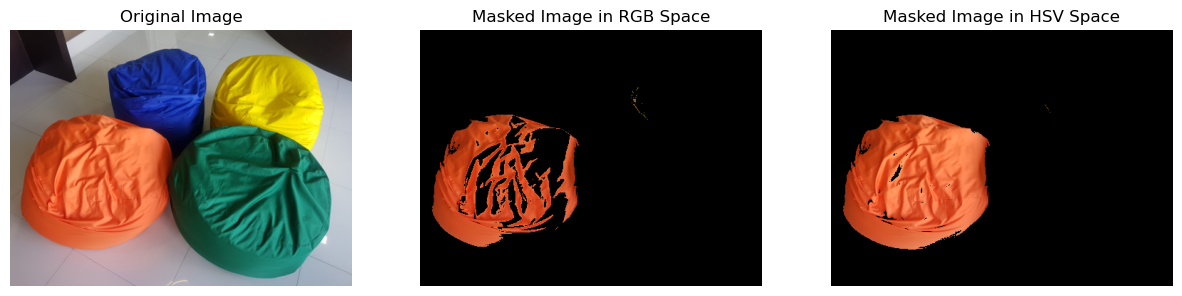

In [763]:
plt.figure(figsize=(15, 5))


plt.subplot(1, 3, 1)
plt.imshow(image_bags_rgb)
plt.title('Original Image')
plt.axis('off')


plt.subplot(1, 3, 2)
plt.imshow(masked_rgb)
plt.title('Masked Image in RGB Space')
plt.axis('off')


plt.subplot(1, 3, 3)
plt.imshow(masked_hsv)
plt.title('Masked Image in HSV Space')
plt.axis('off')

plt.show()

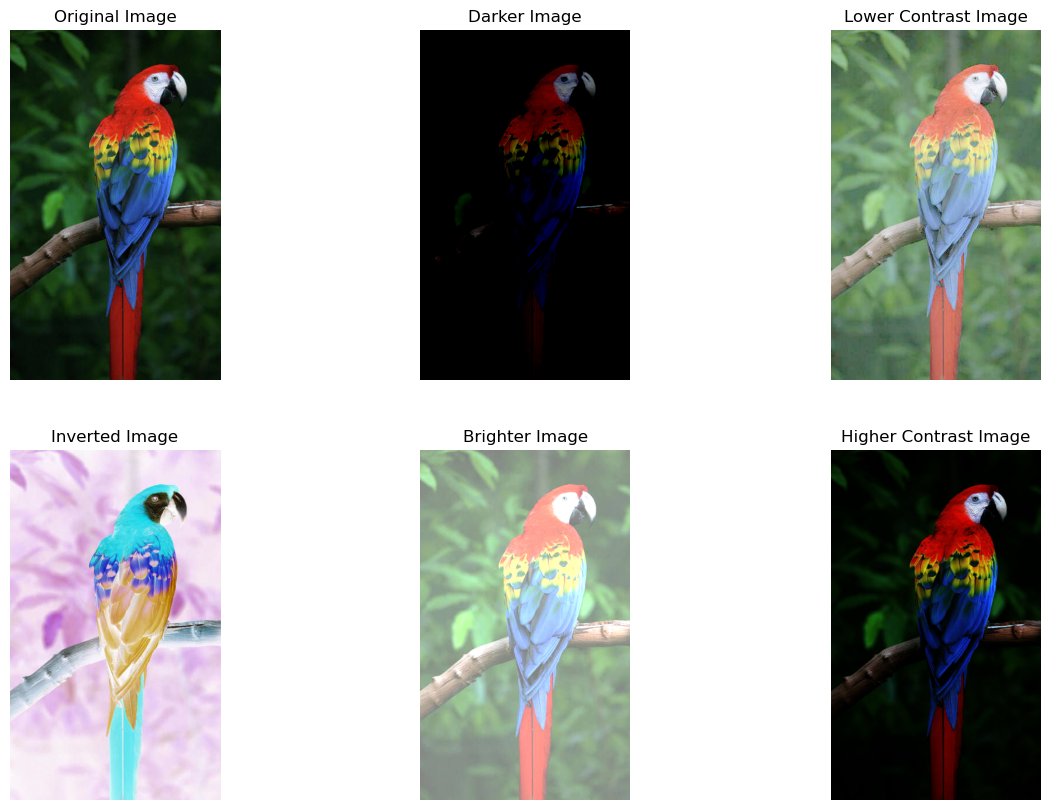

In [765]:


image = cv2.imread('./images/bird.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# a) Create a darker image by subtracting 128 from each pixel intensity value
darker_image = np.clip(image_rgb.astype(np.float32) - 128, 0, 255).astype(np.uint8)

# b) Create a nonlinear lower contrast image using (x/255)^(1/3) * 255
lower_contrast_image = np.clip((image_rgb / 255.0) ** (1/3) * 255, 0, 255).astype(np.uint8)

# c) Invert the original image by updating pixel values as 255 - current pixel intensity value
inverted_image = 255 - image_rgb

# d) Create a brighter image by adding 128 to each pixel intensity value
# Convert to float for the addition
brighter_image = np.clip(image_rgb.astype(np.float32) + 128, 0, 255).astype(np.uint8)

# e) Create a nonlinear higher contrast image using (x/255)^2 * 255
higher_contrast_image = np.clip((image_rgb / 255.0) ** 2 * 255, 0, 255).astype(np.uint8)


plt.figure(figsize=(15, 10))

# Original image
plt.subplot(2, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

# Darker image
plt.subplot(2, 3, 2)
plt.imshow(darker_image)
plt.title('Darker Image')
plt.axis('off')

# Lower contrast image
plt.subplot(2, 3, 3)
plt.imshow(lower_contrast_image)
plt.title('Lower Contrast Image')
plt.axis('off')

# Inverted image
plt.subplot(2, 3, 4)
plt.imshow(inverted_image)
plt.title('Inverted Image')
plt.axis('off')

# Brighter image
plt.subplot(2, 3, 5)
plt.imshow(brighter_image)
plt.title('Brighter Image')
plt.axis('off')

# Higher contrast image
plt.subplot(2, 3, 6)
plt.imshow(higher_contrast_image)
plt.title('Higher Contrast Image')
plt.axis('off')

plt.show()


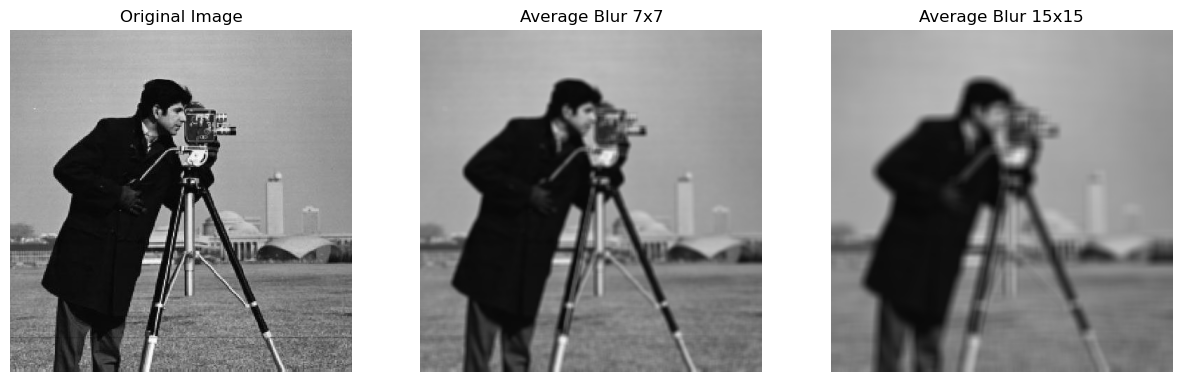

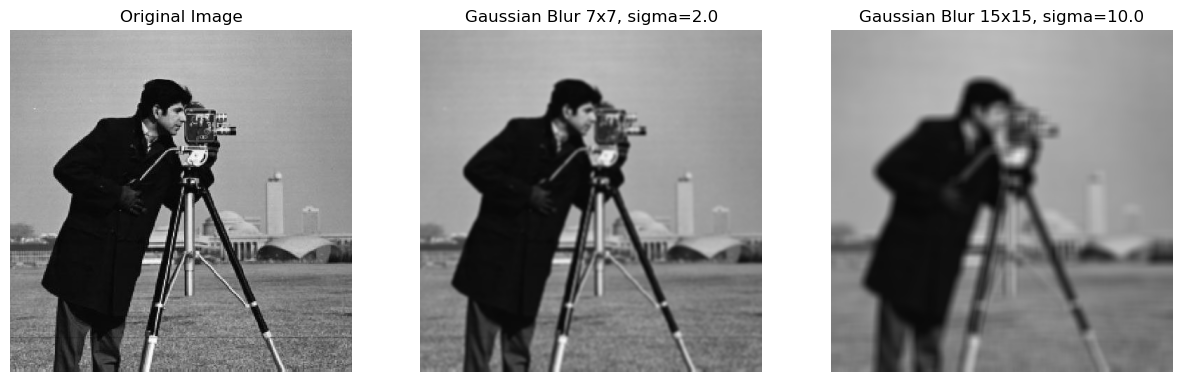

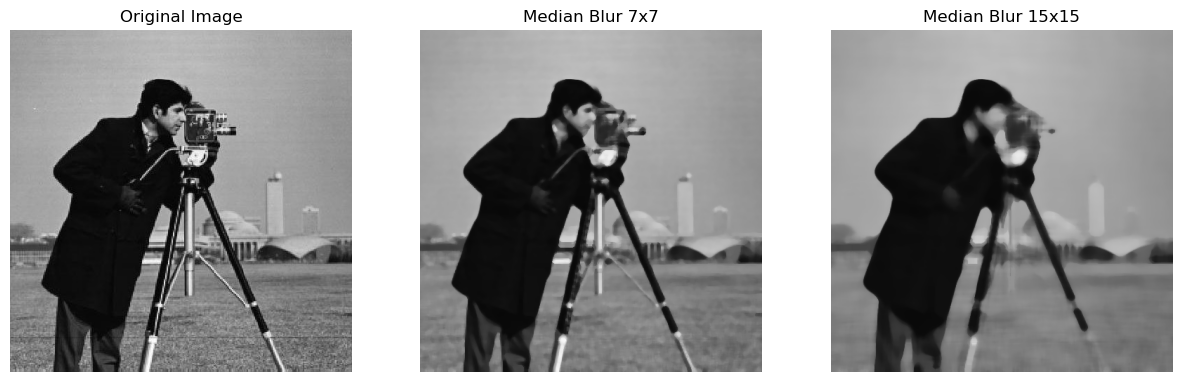

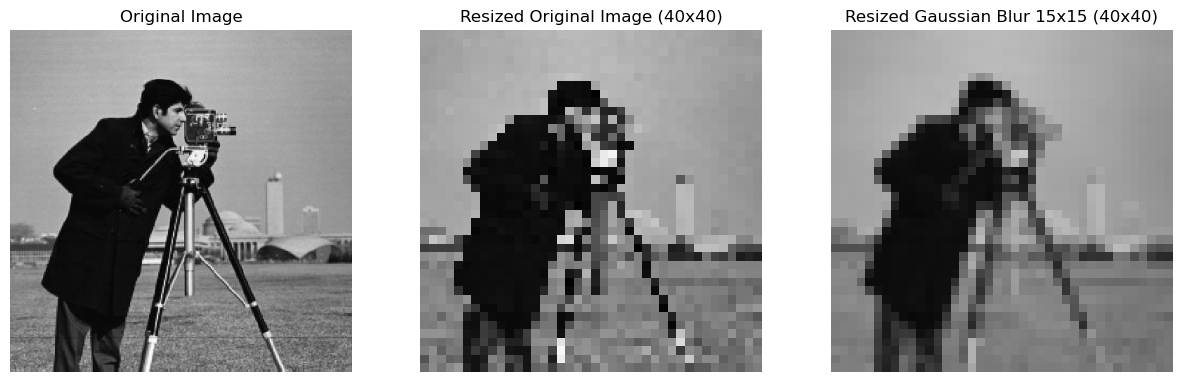

In [766]:

image = cv2.imread('./images/cameraman.jpeg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# a) Average Blur
avg_blur_7x7 = cv2.blur(image_rgb, (7, 7))
avg_blur_15x15 = cv2.blur(image_rgb, (15, 15))


plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(avg_blur_7x7)
plt.title('Average Blur 7x7')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(avg_blur_15x15)
plt.title('Average Blur 15x15')
plt.axis('off')

plt.show()

# b) Gaussian Blur
gaussian_blur_7x7 = cv2.GaussianBlur(image_rgb, (7, 7), sigmaX=2.0)
gaussian_blur_15x15 = cv2.GaussianBlur(image_rgb, (15, 15), sigmaX=10.0)


plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gaussian_blur_7x7)
plt.title('Gaussian Blur 7x7, sigma=2.0')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(gaussian_blur_15x15)
plt.title('Gaussian Blur 15x15, sigma=10.0')
plt.axis('off')

plt.show()

#c) Median Blur
median_blur_7x7 = cv2.medianBlur(image_rgb, 7)
median_blur_15x15 = cv2.medianBlur(image_rgb, 15)


plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(median_blur_7x7)
plt.title('Median Blur 7x7')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(median_blur_15x15)
plt.title('Median Blur 15x15')
plt.axis('off')

plt.show()

#d
resized_image = cv2.resize(image_rgb, (40, 40))
resized_gaussian_blur_15x15 = cv2.resize(gaussian_blur_15x15, (40, 40))


plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(resized_image)
plt.title('Resized Original Image (40x40)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(resized_gaussian_blur_15x15)
plt.title('Resized Gaussian Blur 15x15 (40x40)')
plt.axis('off')

plt.show()


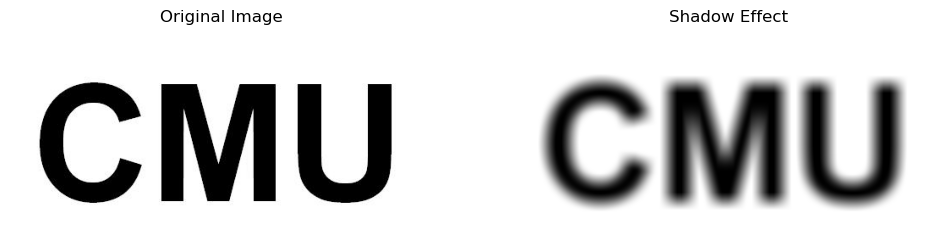

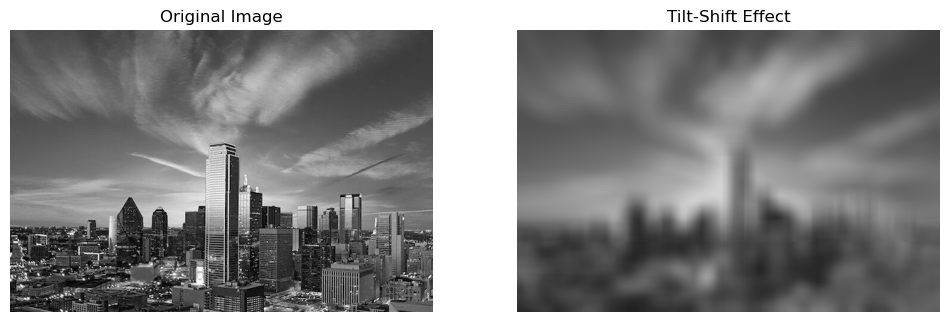

In [768]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image_cmu = cv2.imread('./images/cmu.jpg')
image_cmu_rgb = cv2.cvtColor(image_cmu, cv2.COLOR_BGR2RGB)


shadow_blur = cv2.GaussianBlur(image_cmu_rgb, (21, 21), sigmaX=10.0)


mask = np.zeros(image_cmu_rgb.shape[:2], dtype=np.uint8)
mask[0:500, 0:500] = 255  # Adjust the mask region as needed


shadow_effect = np.where(mask[:, :, None] == 255, shadow_blur, image_cmu_rgb)


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_cmu_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(shadow_effect)
plt.title('Shadow Effect')
plt.axis('off')

plt.show()


image_dallas = cv2.imread('./images/dallas.jpg')
image_dallas_rgb = cv2.cvtColor(image_dallas, cv2.COLOR_BGR2RGB)


height, width = image_dallas_rgb.shape[:2]
mask = np.zeros((height, width), dtype=np.float32)
center = height // 2
focus_height = 100  # Region in focus, adjust as needed
mask[center-focus_height:center+focus_height, :] = 1
mask = cv2.GaussianBlur(mask, (0, 0), 10.0)

foreground_blur = cv2.GaussianBlur(image_dallas_rgb, (31, 31), sigmaX=10.0)
background_blur = cv2.GaussianBlur(image_dallas_rgb, (31, 31), sigmaX=20.0)


tilt_shift_effect = np.where(mask[:, :, None] > 0.5, image_dallas_rgb, foreground_blur)
tilt_shift_effect = np.where(mask[:, :, None] <= 0.5, tilt_shift_effect, background_blur)


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_dallas_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(tilt_shift_effect)
plt.title('Tilt-Shift Effect')
plt.axis('off')

plt.show()
